In [8]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import shutil

# Before Downsampling

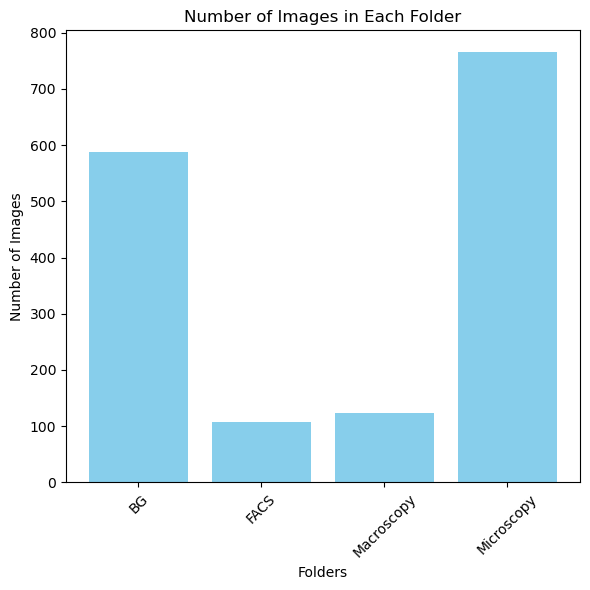

In [4]:
base_dir = r"C:\Users\Kush\MineD\data\test"

image_counts = {}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Count the number of images in the folder
        count = sum([1 for file in os.listdir(folder_path) 
                     if os.path.isfile(os.path.join(folder_path, file)) and 
                     file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))])
        image_counts[folder] = count

plt.figure(figsize=(6, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
def downsample_class(class_path, target_count=500):
    # List all image files in the directory
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    
    # If the number of images exceeds the target, downsample
    if len(image_files) > target_count:
        # Randomly select files to keep
        files_to_keep = random.sample(image_files, target_count)
        
        # Identify files to remove
        files_to_remove = set(image_files) - set(files_to_keep)
        
        # Remove the excess files
        for file_name in files_to_remove:
            os.remove(os.path.join(class_path, file_name))
        print(f"Downsampled {class_path} to {target_count} images.")
    else:
        print(f"No downsampling needed for {class_path}. It already has {len(image_files)} or fewer images.")

# Paths to the BG and Microscopy folders
bg_path = r"C:\Users\Kush\MineD\data\test\BG"
microscopy_path = r"C:\Users\Kush\MineD\data\test\Microscopy"

# Downsample both classes to 500 images each
downsample_class(bg_path, 500)
downsample_class(microscopy_path, 500)


Downsampled C:\Users\Kush\MineD\data\test\BG to 500 images.
Downsampled C:\Users\Kush\MineD\data\test\Microscopy to 500 images.


# After Downsampling

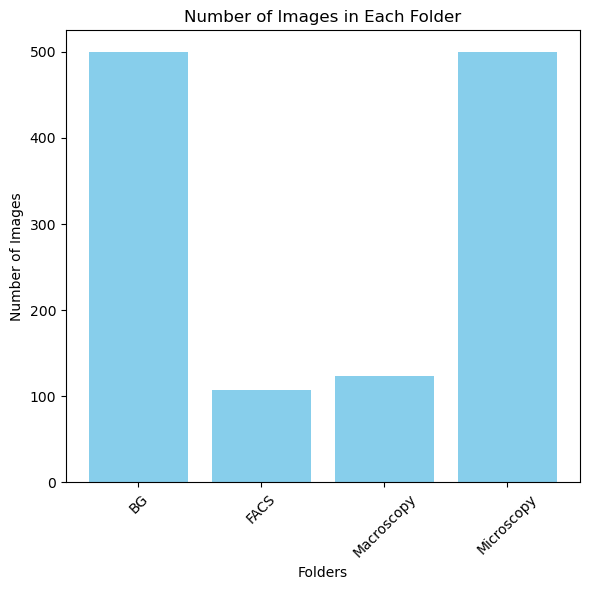

In [7]:
base_dir = r"C:\Users\Kush\MineD\data\test"

image_counts = {}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Count the number of images in the folder
        count = sum([1 for file in os.listdir(folder_path) 
                     if os.path.isfile(os.path.join(folder_path, file)) and 
                     file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))])
        image_counts[folder] = count

plt.figure(figsize=(6, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:

def augment_images(class_path, target_count=500, augment_factor=10):
    # List all image files in the directory
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    
    # Calculate how many images need to be generated
    current_count = len(image_files)
    images_needed = target_count - current_count
    
    # Initialize the ImageDataGenerator with augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    if images_needed > 0:
        print(f"Augmenting {images_needed} images in {class_path} to reach {target_count} images.")
        
        while images_needed > 0:
            for image_file in image_files:
                if images_needed <= 0:
                    break

                # Load and convert image to array
                img = load_img(os.path.join(class_path, image_file))
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                
                # Generate augmented images
                i = 0
                for batch in datagen.flow(x, batch_size=1):
                    new_image_path = os.path.join(class_path, f"aug_{random.randint(10000, 99999)}.png")
                    save_img(new_image_path, array_to_img(batch[0]))
                    i += 1
                    images_needed -= 1
                    
                    if images_needed <= 0 or i >= augment_factor:
                        break
    else:
        print(f"No augmentation needed for {class_path}. It already has {current_count} or more images.")

# Paths to the FACS and Macroscopy folders
facs_path = r"C:\Users\Kush\MineD\data\test\FACS"
macroscopy_path = r"C:\Users\Kush\MineD\data\test\Macroscopy"

# Perform data augmentation on both classes until they each have 500 images
augment_images(facs_path, 500)
augment_images(macroscopy_path, 500)


Augmenting 393 images in C:\Users\Kush\MineD\data\test\FACS to reach 500 images.
Augmenting 377 images in C:\Users\Kush\MineD\data\test\Macroscopy to reach 500 images.


# After Data Augmentation

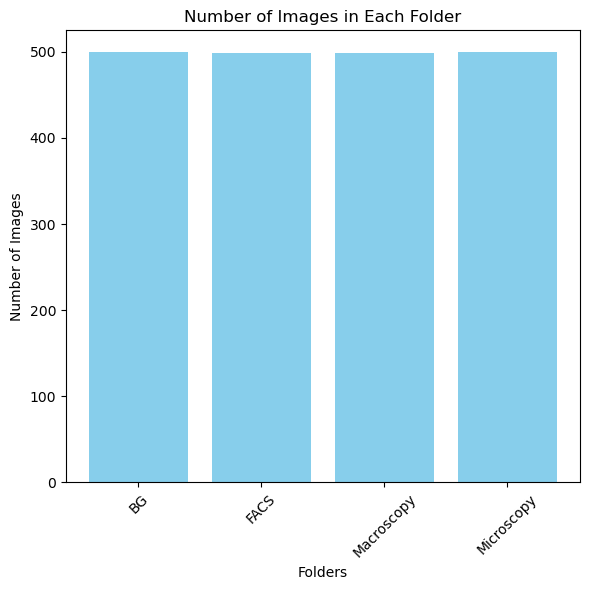

In [10]:
base_dir = r"C:\Users\Kush\MineD\data\test"

image_counts = {}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Count the number of images in the folder
        count = sum([1 for file in os.listdir(folder_path) 
                     if os.path.isfile(os.path.join(folder_path, file)) and 
                     file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))])
        image_counts[folder] = count

plt.figure(figsize=(6, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
